In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/telecom_usage_mixed.csv')
df.head()
df

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,monthly_data_mb_dup,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,U70000,1213.0,15.0,1213.0,17.0,0.0,Basic,No,1.0
1,1041.0,U70001,1215.0,12.0,1215.0,14.0,1.0,UNLIMITED,No,2.0
2,1182.0,U70002,1546.0,199.0,1546.0,3.0,NaN,BASIC,Yes,2.0
3,1281.0,U70003,2014.0,183.0,2014.0,33.0,0.0,Basic,No,0.0
4,1482.0,U70004,6308.0,308.0,6308.0,16.0,0.0,Standard,N,1.0
...,...,...,...,...,...,...,...,...,...,...
252,620.0,U70245,1942.0,131.0,1942.0,16.0,0.0,Basc,No,1.0
253,unknown,U70013,3207.0,424.0,3207.0,9.0,0.0,STANDARD,YES,0.0
254,725.0,U70153,2405.0,458.0,2405.0,30.0,0.0,Unlimited,YES,0.0
255,NaN,U70241,541.0,312.0,541.0,31.0,NaN,Basic,No,3.0


**DATA CLEANING**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   monthly_minutes      244 non-null    object 
 1   user_id              245 non-null    object 
 2   monthly_data_mb      236 non-null    float64
 3   monthly_sms          240 non-null    float64
 4   monthly_data_mb_dup  236 non-null    float64
 5   contract_months      248 non-null    float64
 6   churn_next_month     241 non-null    float64
 7   plan_type            232 non-null    object 
 8   has_family_plan      236 non-null    object 
 9   overdue_payments     242 non-null    float64
dtypes: float64(6), object(4)
memory usage: 20.2+ KB


In [ ]:
df['monthly_minutes'] = pd.to_numeric(df['monthly_minutes'], errors='coerce')

df = df.astype({
    'user_id': 'string',
    'plan_type': 'category',
    'has_family_plan': 'category',
    'monthly_minutes' : 'float64',
    'monthly_data_mb' : 'float64',
})




display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   monthly_minutes      238 non-null    float64 
 1   user_id              245 non-null    string  
 2   monthly_data_mb      236 non-null    float64 
 3   monthly_sms          240 non-null    float64 
 4   monthly_data_mb_dup  236 non-null    float64 
 5   contract_months      248 non-null    float64 
 6   churn_next_month     241 non-null    float64 
 7   plan_type            232 non-null    category
 8   has_family_plan      236 non-null    category
 9   overdue_payments     242 non-null    float64 
dtypes: category(2), float64(7), string(1)
memory usage: 17.8 KB


None

In [ ]:

missing_values = df.isnull()
print(missing_values)
print(df.isnull().sum())

     monthly_minutes  user_id  monthly_data_mb  monthly_sms  \
0              False    False            False        False   
1              False    False            False        False   
2              False    False            False        False   
3              False    False            False        False   
4              False    False            False        False   
..               ...      ...              ...          ...   
252            False    False            False        False   
253             True    False            False        False   
254            False    False            False        False   
255             True    False            False        False   
256            False    False            False        False   

     monthly_data_mb_dup  contract_months  churn_next_month  plan_type  \
0                  False            False             False      False   
1                  False            False             False      False   
2                  Fa

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df['monthly_minutes'] = df['monthly_minutes'].replace('unknown', np.nan)


In [ ]:
print(df['monthly_minutes'].isnull().sum())
df['monthly_minutes'].fillna(df['monthly_minutes'].median(), inplace=True)
print(df['monthly_minutes'].isnull().sum())

17
0


/tmp/ipython-input-2249729976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthly_minutes'].fillna(df['monthly_minutes'].median(), inplace=True)


In [ ]:
df["monthly_minutes"].unique()

array([ 1351.,  1041.,  1182.,  1281.,  1482.,  1430.,  1058.,   876.,
         606.,  1166.,   881.,   600.,  1128.,   638.,   597.,  1205.,
        1555.,   944.,   972.,   917.,   933.,   767.,  1415.,  1059.,
        1019.,   932.,   618.,  1282.,  1213.,  1259.,  1385.,  1362.,
        1791.,  1120.,  1298.,  1004.,   759.,  1212.,  1103.,   502.,
         565.,  1230.,   890.,  1107.,  1145.,   966.,  1177.,  1144.,
         760.,   996.,   682.,  1154.,   860.,  1216.,   928.,  1343.,
        1400.,  1133.,   719.,  1288.,   980.,  1014.,   883.,   585.,
        1322.,   975.,   441.,   959.,   594.,  1136.,  1452.,  1431.,
        1156.,   590.,  1548.,   963.,   643.,  1312.,   673.,  1347.,
         942.,   895.,   610.,   687.,  1048.,   508.,  1207.,   843.,
        1175.,   939.,  1369.,   385.,  1240.,  1007.,   803.,  1285.,
        1176.,  1069.,   924.,   788.,   676.,  1410.,  1248.,  1171.,
         872.,  1610., 39600.,   887.,  1544.,   984.,  1521.,  1114.,
      

In [ ]:
df["user_id"].unique()

<StringArray>
['U70000', 'U70001', 'U70002', 'U70003', 'U70004', 'U70005', 'U70006',
 'U70007', 'U70008', 'U70009',
 ...
 'U70240', 'U70241', 'U70242', 'U70243', 'U70244', 'U70245', 'U70246',
 'U70247', 'U70248', 'U70249']
Length: 239, dtype: string

In [ ]:
df = df.dropna(subset=['user_id'])


In [ ]:
df["plan_type"].unique()


['Basic', 'UNLIMITED', 'BASIC', 'Standard', NaN, ..., 'Sandard', 'Stndard', 'tandard', 'asic', 'Stadard']
Length: 23
Categories (23, object): ['BASIC', 'Baic', 'Basc', 'Basi', ..., 'Unlmited', 'asic', 'nlimited',
                          'tandard']

In [ ]:

df['plan_type'] = df['plan_type'].str.lower().str.strip()

basic_terms = ['basic', 'basi', 'basc', 'bsic', 'baic', 'asic']
standard_terms = ['standard', 'standrd', 'standar', 'stndard', 'sandard', 'tandard', 'stadard']
unlimited_terms = ['unlimited', 'unliited', 'nlimited', 'ulimited', 'unimited', 'unlimitd', 'unlmited']
def clean_plan_type(value):
    if pd.isna(value):
        return np.nan
    elif value in basic_terms:
        return 'Basic'
    elif value in standard_terms:
        return 'Standard'
    elif value in unlimited_terms:
        return 'Unlimited'
    else:
        return np.nan
df['plan_type'] = df['plan_type'].apply(clean_plan_type)

df['plan_type'].fillna(df['plan_type'].mode()[0], inplace=True)

print(df['plan_type'].unique())


['Basic' 'Unlimited' 'Standard']


/tmp/ipython-input-3496631944.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['plan_type'].fillna(df['plan_type'].mode()[0], inplace=True)


In [ ]:
print(df['plan_type'].isnull().sum())

0


In [ ]:
df['monthly_data_mb'].unique()

array([ 1213.,  1215.,  1546.,  2014.,  6308.,  2112.,  4304.,  1625.,
        1972.,   145.,   286.,  1733.,  1007.,  3207.,  1567.,  4279.,
        7175.,   319.,  1004.,  2187.,   729.,    nan,  3361.,  7862.,
        2973.,  1483.,  1169.,  1552.,  1243.,   455.,  4681.,  2285.,
        5988.,   669.,   169.,  3499., 12897.,  1728.,   121.,  3033.,
         153.,  1553.,   650.,  1201.,  4575.,   711.,   980.,  5879.,
         450.,   984.,  2976.,   277.,  1150.,  2401.,  1045.,  2442.,
        1399.,  1897.,  5048.,   235.,  1786.,  2609.,   147.,    46.,
        3133.,   350.,  3624.,  2138.,   807.,  1451.,  6738.,   488.,
        1384.,  1959.,   297.,    89.,    27.,   785.,   154.,   127.,
        1134.,   288.,   780.,  5620.,  1008.,  1371.,   564.,     0.,
        4592.,   170.,  6662.,   280.,  1857., 14873.,   298.,  1103.,
        3032.,    65.,  2341.,   168.,   540.,   349.,   398.,    83.,
        1772.,   850.,  1041.,   254.,  2759.,  1840.,   906.,   376.,
      

In [ ]:
print(df['monthly_data_mb'].isnull().sum())

18


In [ ]:
df['monthly_data_mb'].fillna(df['monthly_data_mb'].median(), inplace=True)


/tmp/ipython-input-2176031979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthly_data_mb'].fillna(df['monthly_data_mb'].median(), inplace=True)


In [ ]:
print(df['monthly_data_mb'].isnull().sum())

0


In [ ]:
df.drop(columns=['monthly_data_mb_dup'], inplace=True)


In [ ]:
df['monthly_data_mb'].fillna(df['monthly_data_mb'].median(), inplace=True)
df['monthly_sms'].fillna(df['monthly_sms'].median(), inplace=True)
df['contract_months'].fillna(method='ffill', inplace=True)
df['overdue_payments'].fillna(df['overdue_payments'].median(), inplace=True)

/tmp/ipython-input-490920274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthly_data_mb'].fillna(df['monthly_data_mb'].median(), inplace=True)
/tmp/ipython-input-490920274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df.isnull().sum()

,0
monthly_minutes,0
user_id,0
monthly_data_mb,0
monthly_sms,0
contract_months,0
churn_next_month,14
plan_type,0
has_family_plan,20
overdue_payments,0


In [ ]:
df['has_family_plan'].unique()

['No', 'Yes', 'N', 'es', 'o', 'YES', NaN, 'NO', 'Ys', 'Ye']
Categories (9, object): ['N', 'NO', 'No', 'YES', ..., 'Yes', 'Ys', 'es', 'o']

In [ ]:

df['has_family_plan'] = df['has_family_plan'].replace({
    'YES': 'Yes',
    'Y': 'Yes',
    'Ye': 'Yes',
    'Ys': 'Yes',
    'es': 'Yes',
    'N': 'No',
    'NO': 'No',
    'o': 'No'
})


/tmp/ipython-input-3782175430.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['has_family_plan'] = df['has_family_plan'].replace({


In [ ]:
df['has_family_plan'].unique()

['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']

In [ ]:
df['has_family_plan'].fillna(df['has_family_plan'].mode()[0], inplace=True)


/tmp/ipython-input-657857051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_family_plan'].fillna(df['has_family_plan'].mode()[0], inplace=True)


In [ ]:
df['churn_next_month'] = df['churn_next_month'].replace({
    1: 'Yes',
    0: 'No'
})


In [ ]:
df['churn_next_month'].fillna(df['churn_next_month'].mode()[0], inplace=True)

/tmp/ipython-input-3188822357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['churn_next_month'].fillna(df['churn_next_month'].mode()[0], inplace=True)


In [ ]:
df

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,U70000,1213.0,15.0,17.0,No,Basic,No,1.0
1,1041.0,U70001,1215.0,12.0,14.0,Yes,Unlimited,No,2.0
2,1182.0,U70002,1546.0,199.0,3.0,No,Basic,Yes,2.0
3,1281.0,U70003,2014.0,183.0,33.0,No,Basic,No,0.0
4,1482.0,U70004,6308.0,308.0,16.0,No,Standard,No,1.0
...,...,...,...,...,...,...,...,...,...
245,620.0,U70245,1942.0,131.0,16.0,No,Basic,No,1.0
246,781.0,U70246,1163.0,289.0,24.0,No,Unlimited,No,1.0
247,858.0,U70247,550.0,449.0,29.0,No,Standard,Yes,1.0
248,1200.0,U70248,1127.0,446.0,28.0,No,Standard,Yes,1.0


In [ ]:

df.to_csv('cleaned_churn_dataset.csv', index=False)


**EXPLORATORY DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


eda_df = pd.read_csv('/content/cleaned_churn_dataset.csv')






In [ ]:

cat_cols = eda_df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)


Index(['user_id', 'churn_next_month', 'plan_type', 'has_family_plan'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    eda_df[col] = le.fit_transform(eda_df[col].astype(str))
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   monthly_minutes   238 non-null    float64
 1   user_id           238 non-null    int64  
 2   monthly_data_mb   238 non-null    float64
 3   monthly_sms       238 non-null    float64
 4   contract_months   238 non-null    float64
 5   churn_next_month  238 non-null    int64  
 6   plan_type         238 non-null    int64  
 7   has_family_plan   238 non-null    int64  
 8   overdue_payments  238 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 16.9 KB


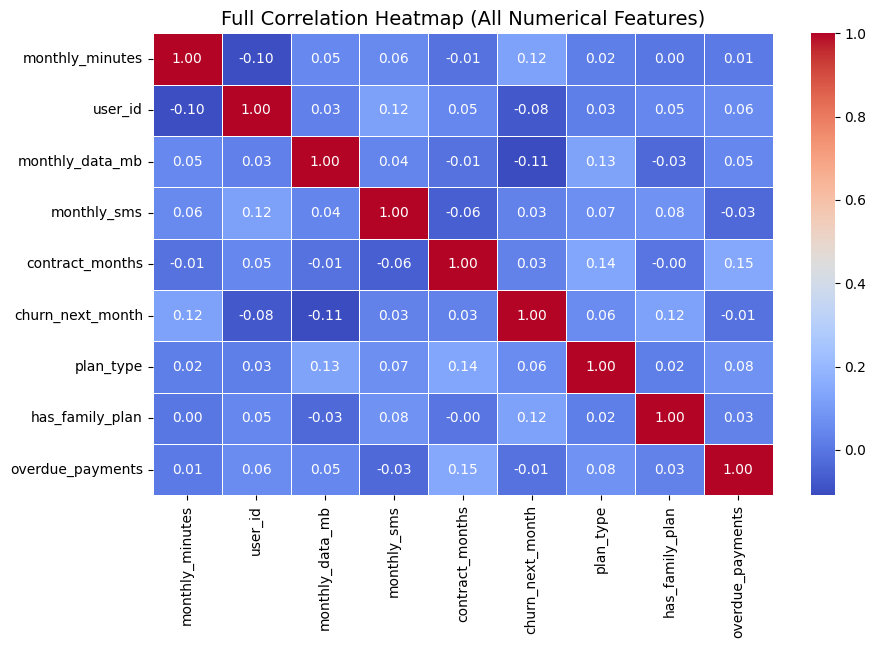

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = eda_df.select_dtypes(include=['int64', 'float64'])


corr = numeric_df.corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Full Correlation Heatmap (All Numerical Features)", fontsize=14)
plt.show()


In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   monthly_minutes   238 non-null    float64
 1   user_id           238 non-null    int64  
 2   monthly_data_mb   238 non-null    float64
 3   monthly_sms       238 non-null    float64
 4   contract_months   238 non-null    float64
 5   churn_next_month  238 non-null    int64  
 6   plan_type         238 non-null    int64  
 7   has_family_plan   238 non-null    int64  
 8   overdue_payments  238 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 16.9 KB


/tmp/ipython-input-1633916591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_next_month', y=feature, data=eda_df, palette='viridis', errorbar=None)


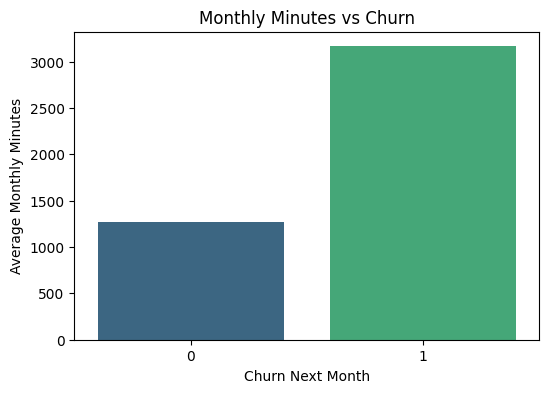

/tmp/ipython-input-1633916591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_next_month', y=feature, data=eda_df, palette='viridis', errorbar=None)


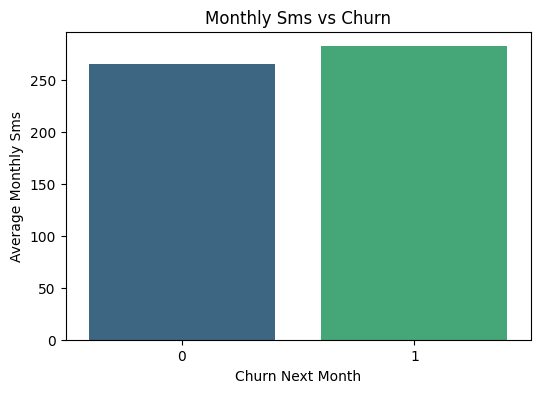

/tmp/ipython-input-1633916591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_next_month', y=feature, data=eda_df, palette='viridis', errorbar=None)


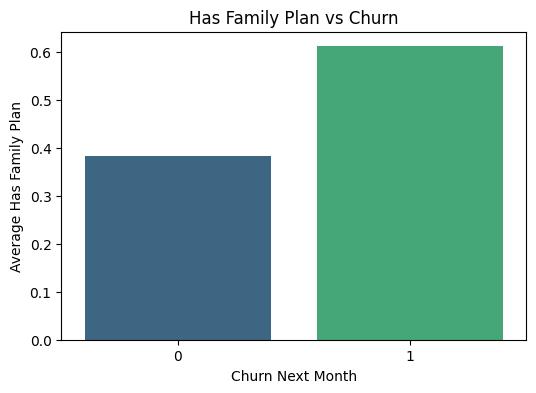

In [ ]:
num_features = ['monthly_minutes', 'monthly_sms','has_family_plan']

for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.barplot(x='churn_next_month', y=feature, data=eda_df, palette='viridis', errorbar=None)
    plt.title(f'{feature.replace("_", " ").title()} vs Churn')
    plt.ylabel(f'Average {feature.replace("_", " ").title()}')
    plt.xlabel('Churn Next Month')
    plt.show()


/tmp/ipython-input-647943257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plan_type', y='churn_next_month', data=eda_df, palette='Set2',errorbar=None)


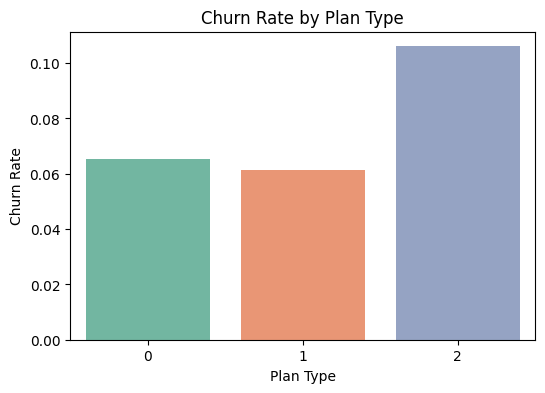

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='plan_type', y='churn_next_month', data=eda_df, palette='Set2',errorbar=None)
plt.title('Churn Rate by Plan Type')
plt.ylabel('Churn Rate')
plt.xlabel('Plan Type')
plt.show()


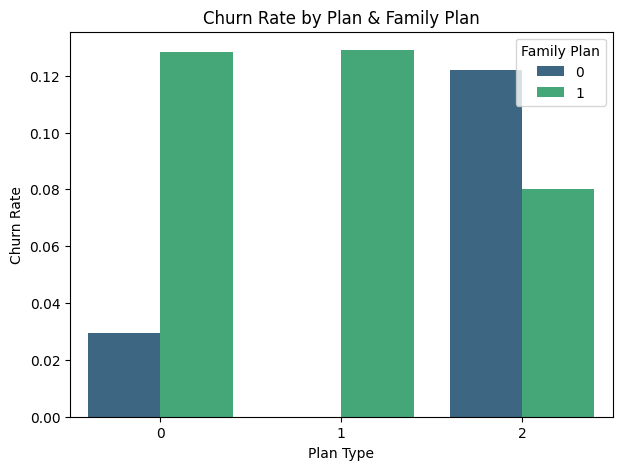

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='plan_type', y='churn_next_month', hue='has_family_plan',
            data=eda_df, palette='viridis',errorbar=None)
plt.title('Churn Rate by Plan & Family Plan')
plt.ylabel('Churn Rate')
plt.xlabel('Plan Type')
plt.legend(title='Family Plan')
plt.show()


**Final Report**



Our Main target columns is the churn_next_month . Hence we used Heat map and found the most correlated columns . We found the two columns which are most correlated. the are the plan_type and the family_plan . Hence we analyis that the more churn rate is found in the standard plan users with the Family plan and the next Basic plan with family plan . Basic plan users with the no family plan have less churn rate .